In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
import pandas as pd

df = pd.read_csv('Samsung.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4651.737793,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4248.232422,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4278.686523,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4217.780273,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4392.884766,46880000


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5621 entries, 0 to 5620
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5621 non-null   object 
 1   Open       5621 non-null   float64
 2   High       5621 non-null   float64
 3   Low        5621 non-null   float64
 4   Close      5621 non-null   float64
 5   Adj Close  5621 non-null   float64
 6   Volume     5621 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 307.5+ KB


In [12]:
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [13]:
# Select features and target variable
X = df[['Open', 'High', 'Low', 'Volume', 'Adj Close']]
y = df['Close']

In [14]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'SVM': SVR(kernel='rbf'),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

In [17]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'SVM': SVR(kernel='rbf'),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

In [18]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        'R2 Score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred)
    }

In [19]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

                   R2 Score           MSE           MAE
Linear Regression  0.999874  5.054543e+04    123.606522
KNN                0.999371  2.527269e+05    258.273778
SVM               -0.064075  4.275594e+08  14272.592077
Random Forest      0.999898  4.106964e+04    108.861244


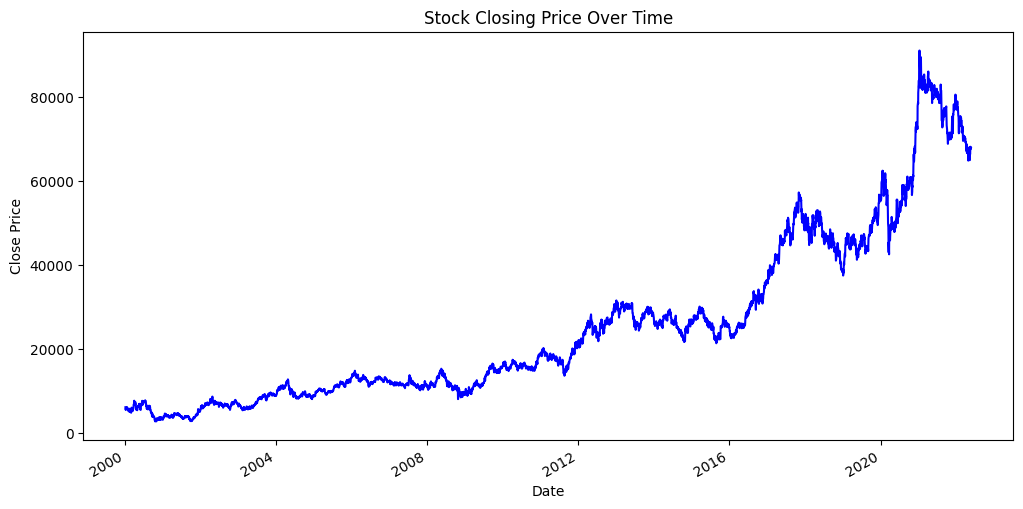

In [20]:
# --- Visualization ---
plt.figure(figsize=(12, 6))
df['Close'].plot(title='Stock Closing Price Over Time', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

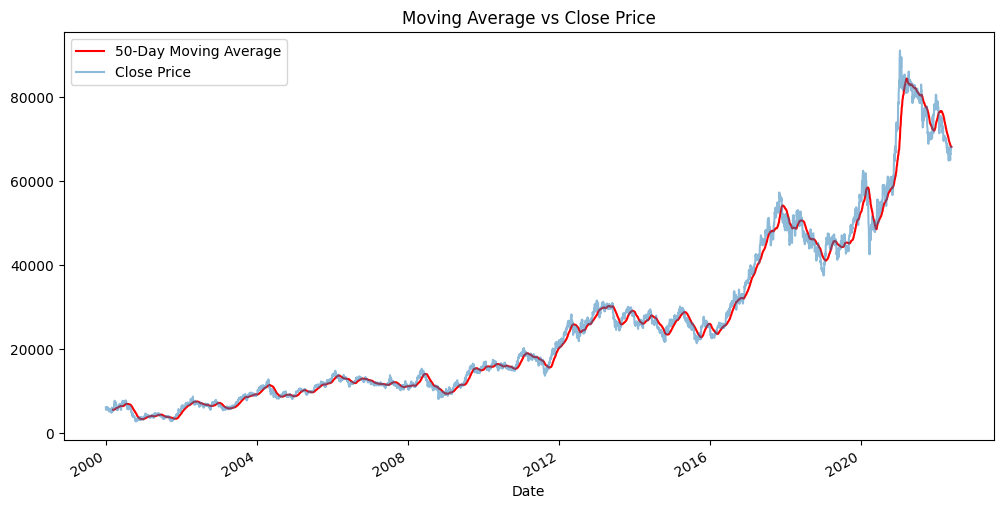

In [21]:
# Moving average plot
plt.figure(figsize=(12, 6))
df['Close'].rolling(window=50).mean().plot(label='50-Day Moving Average', color='red')
df['Close'].plot(label='Close Price', alpha=0.5)
plt.legend()
plt.title('Moving Average vs Close Price')
plt.show()

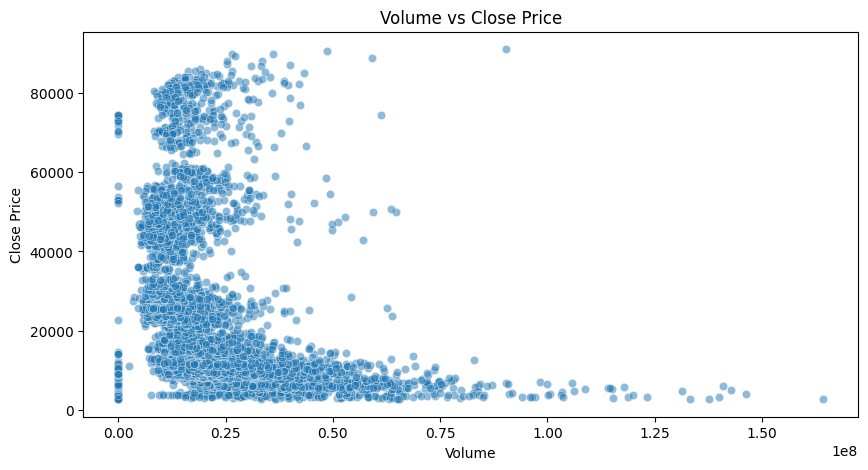

In [22]:
# Volume vs Close Price scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Volume'], y=df['Close'], alpha=0.5)
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.title('Volume vs Close Price')
plt.show()

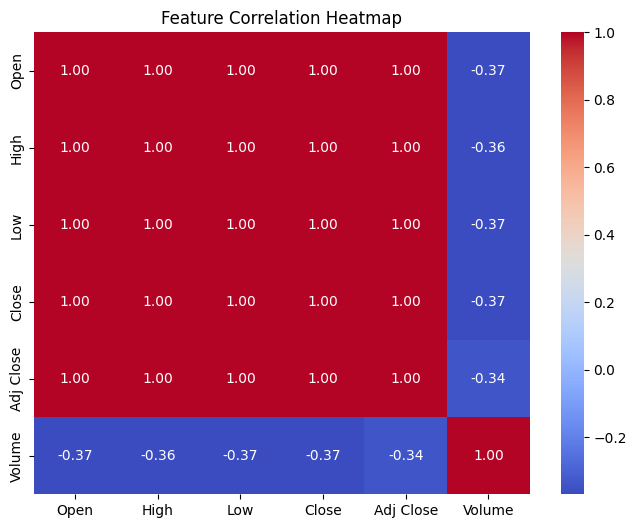

In [23]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

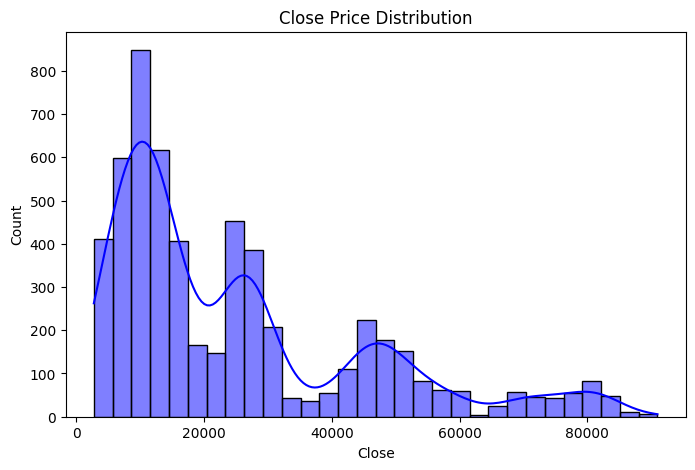

In [24]:
# Close price distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Close'], bins=30, kde=True, color='blue')
plt.title('Close Price Distribution')
plt.show()

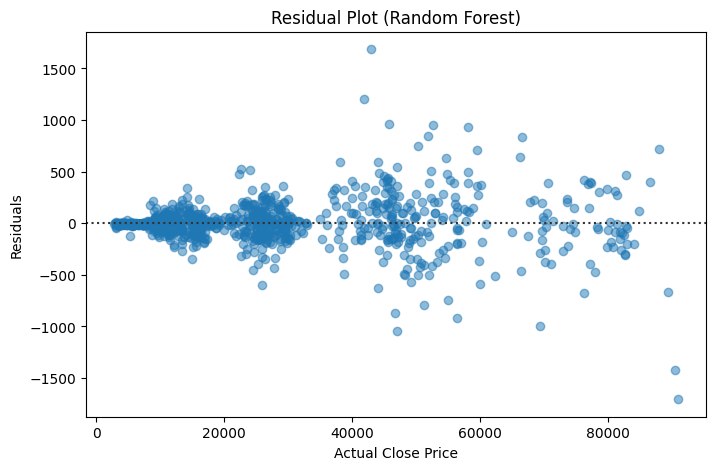

In [31]:
import statsmodels.api as sm
# Residual plot
plt.figure(figsize=(8, 5))
y_pred_rf = models['Random Forest'].predict(X_test_scaled)
sns.residplot(x=y_test, y=y_pred, scatter_kws={"alpha": 0.5})
plt.xlabel('Actual Close Price')
plt.ylabel('Residuals')
plt.title('Residual Plot (Random Forest)')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14492\1964291747.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['R2 Score'], palette='coolwarm')


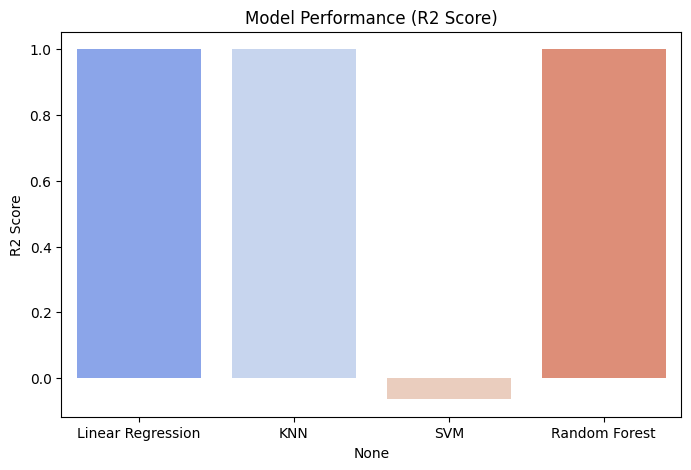

In [26]:
# Model Performance Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=results_df.index, y=results_df['R2 Score'], palette='coolwarm')
plt.title('Model Performance (R2 Score)')
plt.ylabel('R2 Score')
plt.show()